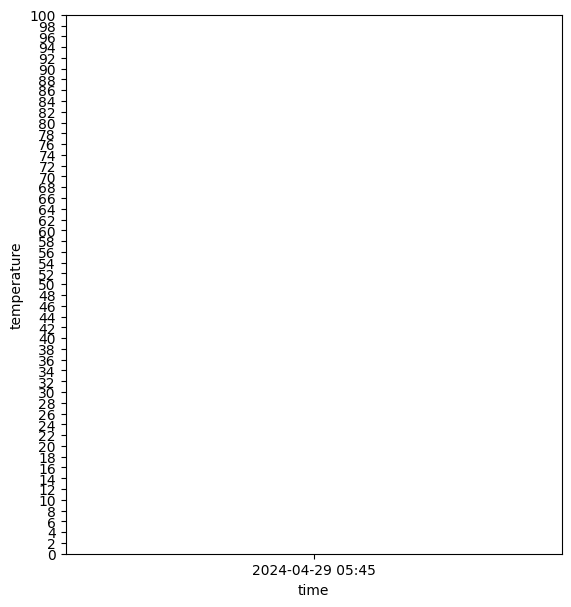

,temperature,humidity,time
0,31,69,2024-04-29 05:45:35+08:00


Temp: 31 
 Hum: 69


In [4]:
import dht11 as DHT
import arrow
import st7735_custom
import pandas as pd
from IPython.display import display
from IPython.display import clear_output
from time import sleep
import digitalio
import board
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image

lcd = st7735_custom.ST7735( cs_pin = digitalio.DigitalInOut(board.CE0),
                            dc_pin = digitalio.DigitalInOut(board.D25),
                            reset_pin = digitalio.DigitalInOut(board.D24))

dht = DHT.DHT11(pin = 2)

dht_results = pd.DataFrame([],columns=["temperature", "humidity", "time"])

while(True):
    result = dht.read()

    if result.is_valid():
        clear_output(wait=False)
        dht_results.loc[len(dht_results.index)] = [result.temperature, result.humidity, arrow.now(tz="+08:00").format()]
        
        dht_plot = dht_results.copy()
        dht_plot.time = dht_plot.time.apply(lambda x: arrow.get(x).format('YYYY-MM-DD HH:mm'))
        plt.figure().set_figheight(7)
        sns.lineplot(x="time", y="temperature", data=dht_plot)
        sns.lineplot(x="time", y="humidity", data=dht_plot)
        plt.yticks(np.arange(0, 101, 2))
        
        __tmpfile = BytesIO()
        plt.savefig("plot.jpg", format='jpg')

        plot = plt.show()

        display(dht_results)
        print(f"Temp: {dht_results.loc[len(dht_results.index)-1, 'temperature']} \n Hum: {dht_results.loc[len(dht_results.index)-1, 'humidity']}")

        # lcd.custom_rectangle(color1=st7735_custom.BLACK, color2=st7735_custom.WHITE)
        # lcd.__image = Image.open(__tmpfile).rotate(0).resize((lcd.width, lcd.height))
        lcd.custom_img("plot.jpg")
        lcd.custom_text(text=f"Temp: {dht_results.loc[len(dht_results.index)-1, 'temperature']} \n Hum: {dht_results.loc[len(dht_results.index)-1, 'humidity']}", color=st7735_custom.RED)
        lcd.image()